**Fall 2019**

**P556: Applied Machine Learning**

**Assignment #1**

**Due date: September 18, 2019. 11:59 PM**

DO NOT CHANGE THE FUNCTION DEFINITIONS UNLESS APPROVED BY AN AI.

# Problem #1: Linear Regression

##  Problem 1.1 (25 points)

Implement linear regression using gradient descent. Your implementation should be able to handle simple and multiple linear regression.

Note 1: by implementation we mean that everything has to be written from scratch and that you cannot call a linear regression function from a library, such as sklearn. Usage of standard libraries, such as numpy, pandas, etc., is fine. If you are unsure about whether a library can be used, please contact the AIs well in advance of the submission date.

Note 2: You are free to use sklearn to test whether your results match that from a battle-tested library. This is a great way to know before hand whether your submission is correct. Make sure to use the same parameters on both models before you spend an eternity debugging code that is correct but not returning the same values.

In [54]:
import numpy as np

class linear_regression:
    
    def __init__(self, learning_rate, iterations, 
               fit_intercept=True, normalize=False, coef=None):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.learning_rate = learning_rate#alpha
        self.iterations = iterations
        self.coef = coef#theta
    
    def fit(self, X, y):
"""
Fit linear model.
Parameters
----------
X : array-like, shape (n_samples, n_features)
Training data
y : array_like, shape (n_samples, n_targets)
Target values.
"""
#pass
        if self.normalize is True:
            Xt=X.transpose()
            mean=np.mean(Xt,axis=1).reshape(len(Xt),1)
            std=np.std(Xt,axis=1).reshape(len(Xt),1)
            Xt=(Xt-mean)/std#normalize
            X=Xt.transpose()
        m=len(X)
        X = np.c_[np.ones(len(X)), X] # appended 1


      
        for i in range(iterations):
            H=X @ self.coef
            error=H.T-y.T
            gradient=error@X*(1/m)
            gradient=gradient.T
            self.coef=self.coef-self.learning_rate*gradient
        return self.coef

  
    def predict(self, X):
        """Predict using the linear model
Parameters
----------
X : array_like, shape (n_samples, n_features)
Samples.
Returns
-------
C : array, shape (n_samples,)
Returns predicted values.
"""
#pass
        if self.normalize is True:
            Xt=X.transpose()
            mean=np.mean(Xt,axis=1).reshape(len(Xt),1)
            std=np.std(Xt,axis=1).reshape(len(Xt),1)
            Xt=(Xt-mean)/std#normalize
            X=Xt.transpose()    
        X = np.c_[np.ones(len(X)), X]
        Y_predicted=X@self.coef
        return Y_predicted



## Problem 1.2 (10 points)

- Split the Boston Housing dataset into train and test sets (70% and 30%, respectively) (5 points). 
- Fit your linear regression implementation using the training set and print your model's coefficients. Make predictions for the test set using your fitted model (5 points).

In [91]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

if __name__=="__main__":
    boston=load_boston()
    
    learning_rate=0.00001
    iterations=3795000
    
    coef=np.zeros((14,1))


    target=boston.target.reshape(len(boston.target),1)

    
    X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                        target,
                                                        test_size=.30,
                                                        random_state=0)
    
    obj=linear_regression(learning_rate,iterations,True,True,coef)
    coef=obj.fit(X_train,y_train)
    y_pred=obj.predict(X_test)
    print('coefficients are: \n')
    print(coef)
    print('predictions for the values are: \n')
    print(y_pred)
    



coefficients are: 

[[ 2.27454802e+01]
 [-9.99833066e-01]
 [ 1.02928050e+00]
 [ 1.13582948e-02]
 [ 6.28799097e-01]
 [-1.85168686e+00]
 [ 2.71919641e+00]
 [-2.94781537e-01]
 [-3.09819062e+00]
 [ 1.92748412e+00]
 [-1.69691508e+00]
 [-2.25313646e+00]
 [ 5.79465015e-01]
 [-3.43475227e+00]]
predictions for the values are: 

[[26.21099431]
 [24.08584697]
 [30.11255542]
 [12.64589313]
 [22.34925452]
 [19.87381584]
 [21.02053542]
 [21.94961943]
 [19.92170814]
 [21.31699869]
 [ 7.15578862]
 [17.90357197]
 [17.74072766]
 [ 6.14105429]
 [41.02316569]
 [34.01504635]
 [22.91128605]
 [38.40158554]
 [32.01712433]
 [23.9529684 ]
 [25.51876518]
 [25.68216798]
 [21.24052701]
 [31.44275339]
 [23.3439297 ]
 [10.88175682]
 [18.1526488 ]
 [19.61278372]
 [36.54220974]
 [21.77198036]
 [18.79881048]
 [18.22344507]
 [20.5125031 ]
 [24.92917348]
 [29.93839836]
 [19.73617965]
 [11.90239614]
 [24.98052119]
 [18.88860446]
 [16.24405856]
 [27.38549613]
 [21.88676881]
 [23.52653156]
 [16.015243  ]
 [24.16769547]
 [25

## Problem 1.3 (10 points)

Identify the variable or set of variables that will minimize the mean square error (MSE). Hint: this is where your function being able to handle simple and multiple regression becomes useful.

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np

class linear_regression:
    
    def __init__(self, learning_rate, iterations, 
               fit_intercept=True, normalize=False, coef=None):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.learning_rate = learning_rate#alpha
        self.iterations = iterations
        self.coef = coef#theta
    
    def fit(self, X, y):
        if self.normalize is True:
            Xt=X.transpose()
            mean=np.mean(Xt,axis=1).reshape(len(Xt),1)
            std=np.std(Xt,axis=1).reshape(len(Xt),1)
            Xt=(Xt-mean)/std#normalize
            X=Xt.transpose()
        m=len(X)
        X = np.c_[np.ones(len(X)), X] # appended 1


      
        for i in range(iterations):
            H=X @ self.coef
            error=H.T-y.T
            gradient=error@X*(1/m)
            gradient=gradient.T
            self.coef=self.coef-self.learning_rate*gradient
        return self.coef
    
    def predict(self, X):
        if self.normalize is True:
            Xt=X.transpose()
            mean=np.mean(Xt,axis=1).reshape(len(Xt),1)
            std=np.std(Xt,axis=1).reshape(len(Xt),1)
            Xt=(Xt-mean)/std#normalize
            X=Xt.transpose()    
        X = np.c_[np.ones(len(X)), X]
        Y_predicted=X@self.coef
        return Y_predicted



if __name__=="__main__":
    boston=load_boston()
    



    target=boston.target.reshape(len(boston.target),1)

    
    X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                        target,
                                                        test_size=.30,
                                                        random_state=0)




    coef=np.zeros((2,1))
    learning_rate=0.00001
    iterations=3795000

    col=np.size(X_test,axis=1)
    c=-1
    mse_min=9999
    for i in range(col):
        obj=linear_regression(learning_rate,iterations,True,True,coef)
        coef=obj.fit(X_train[:,[i]],y_train)
        y_pred=obj.predict(X_test[:,[0]])
        mse=mean_squared_error(y_test,y_pred)
        if mse<mse_min:
            c=i
            mse_min=mse
        
    print('The feature which minimized the Mean Squared Error is: Column '+str(c))

The feature which minimized the Mean Squared Error is: Column 0


## Problem 1.4 (5 points)

1. How do you interpret that a variable causes a model's mean square error to increase? (2 points)
  - Answer: We need to study the variables which are located far away or are odd one. The points which have the largest difference from the mean of the dataset, will cause the mean square error to increase. This can be explained in terms of bias and variance. A high bias and high variance or a high bias and low variance of some particular data points can greatly affect the mean square error of a model to increase.
  Mathematically, mean square error can be written as Sum of (Ypredicted - Yactual)^2. If the datapoint is far off the mean, it will cause it to increase.
  
2. Why we would want to normalize our variables? (1 point)
  - Answer:
  Normalize is important to scale the value of our dataset around a similar scale, so that, it is easy to make calculations. Also, if the range of one feature is very large, say, area of the house, which is typically in the range 1000 to 2000, whereas, the number of rooms in a house has a range of 1 to 5, the area feature will affect the result more, but that may not be true.
  So, we normalize a dataset of a particulat feature X(j) using the following: (X(i)(j)-X(j)(mean))/X(j)(standard deviation). Where, (i) is the row, and (j) is the feature.
  
  In the Boston Data set, without normalization, the data range was exceeded and the result was NaN(Not a Number). It happened because some of the values were too large or too small to multiply. After normalization, the data returned was well within the accepted range.
  
3. A model fitted using the exact same split dataset with normalized values will generate the same coefficients as a model that was fitted using values that haven't been normalized. Clearly state whether that statement is true or false and explain your reasoning. (2 points)
  - Answer:
  A normalized dataset will generate different coefficients than a non normalized dataset. This is because, the range of the dataset has been limited to a few integers. Also, each feature will have almost similar importance in the calculation of the coefficients, unlike before when the larger valued features had larger impact. The coefficients will be scaled, but not the same.
  

# Problem 2: Binary Classification

## Problem 2.1 (5 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 (i.e. $y=-1$) and $k_1$ points on the side of class 1 (i.e. $y=1$). Create a plot of this dataset where all the points corresponding to one class are blue and those of the other class are green, the line dividing both classes should be red. Axes should be labeled.

**Note**: Do not confuse the $x$ and $y$ in the equation of line $ax + by + c = 0$ with $\mathcal{X} $ and $\mathcal{Y}$. Instead imagine these $x$ and $y$ as the 2-D coordinate system on which you have different points which should lie on 2 sides of the line $ax + by + c = 0$. For example, there is a point (2,3) in the 2-D system where $x = 2$ and $y = 3$.

In [90]:
import numpy as np
def generate_dataset(k0, k1):
    
    """
    Parameters
    ----------
    k0 : integer, number of samples for class 0
    k1 : integer, number of samples for class 1
    
    Returns
    -------
    X : array, shape (m, d), dimension numpy array where m is the number of 
    samples and d is the number of features 

    Y : array, (m, 1), dimension vector where m is the number of samples
    """
    #pass
    flag=1
    m=k0+k1#Total no. of samples
    d=6#not specified, so hardcoded
    # Initialize Weights w
    w=np.random.randint(1,10, size=(d+1,1))
    flag=0

    while(flag==0):
        X1=np.random.randint(-100,100, size=(1,d))
        X1temp=X1
        X1 = np.c_[np.ones(len(X1)), X1]
        H_theta=X1@w
        if(H_theta<0):
            flag=1
       
        
    if (H_theta<0):
        while(np.size(X1,axis=0)<k0):
            b=np.random.randint(-100,100, size=(1,d))
            btemp=b
            b=np.c_[np.ones(len(b)), b]
            if(b@w<0):
                X1=np.append(X1,b,axis=0)
                X1temp=np.append(X1temp,btemp,axis=0) 
    Y1=np.full((k0,1),-1)
           
    flag=0
    while(flag==0):
        X2=np.random.randint(-100,100, size=(1,d))
        X2temp=X2
        X2 = np.c_[np.ones(len(X2)), X2]
        H_theta=X2@w
        if(H_theta>0):
            flag=1
           
    if (H_theta>0):
        while(np.size(X2,axis=0)<k1):
            b=np.random.randint(-100,100, size=(1,d))
            btemp=b
            b=np.c_[np.ones(len(b)), b]
            if(b@w>0):
                X2=np.append(X2,b,axis=0)
                X2temp=np.append(X2temp,btemp,axis=0)
                
    Y2=np.full((k1,1),1) 

    X=np.append(X1temp,X2temp,axis=0)
    Xfull=np.append(X1,X2,axis=0)
    Y=np.append(Y1,Y2,axis=0)

        
    return(X,Y)

    


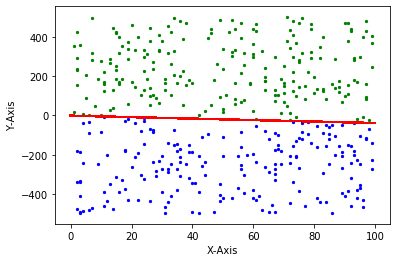

In [88]:
import random
import matplotlib.pyplot as plt

def generate_dataset(k0, k1):
    
    #choosing the value of a,b,c in the equation of ax+by+c=0
    a,b,c=np.random.randint(1,9,3)#initializing w
    list1=[]#class0
    target_y1=[]
    list2=[]#class1
    target_y2=[]
    
    def valueofy(m,x,c):
        return ((m*x)+c)
    
    x00=0
    y00=valueofy(-a/b,x00,-c/b)
    
    
    x01=100
    y01=valueofy(-a/b,x01,-c/b)

    x,y=[x00,x01] ,[y00,y01]

    
    while(len(list1)<k0):
        x1=np.random.randint(1,100)
        y1=random.randrange(start=-500, stop=int(valueofy(-a/b,x1,-c/b)))
        if [x1,y1] not in list1:
            list1.append([x1,y1])
            target_y1.append([-1])#=[0]*100
            
    for blue in list1:
        plt.scatter(blue[0],blue[1],color='blue',s=5)
#    print(list1)
            
    while(len(list2)<k1):
        x2=np.random.randint(1,100)
        y2=random.randrange(start=int(valueofy(-a/b,x2,-c/b)), stop=500)
        if [x2,y2] not in list2:
            list2.append([x2,y2])
            target_y2.append([1])#=[0]*100
            
    for green in list2:
        plt.scatter(green[0],green[1],color='green',s=5)
#    print(list2)
            
        plt.plot(x,y,color='red')
        plt.xlabel('X-Axis')
        plt.ylabel('Y-Axis')
#        var.set_ylabel('Y-Axis')
    list1=np.asarray(list1)
    list2=np.asarray(list2)
#    Y=np.asarray([[-1]*k0])
    X=np.concatenate([list1,list2])
    Y=np.concatenate([target_y1,target_y2])

    return(X,Y)
    

    
    
"""
Parameters
----------
k0 : integer, number of samples for class 0
k1 : integer, number of samples for class 1
Returns
-------
X : array, shape (m, d), dimension numpy array where m is the number of
samples and d is the number of features
Y : array, (m, 1), dimension vector where m is the number of samples
"""
#pass
if __name__=="__main__":
    var=generate_dataset(200,220)

## Problem 2.2 (35 points)

If $\mathcal{Y}$ is the variable you are trying to predict using a feature $\mathcal{X}$ then in a typical Machine Learning problem, you are tasked with a target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$ i.e. Find $f$ such that  $\mathcal{Y}$  = $f(\mathcal{X})$


When you are given a dataset for which you do not have access the target function $f$, you have to learn it from the data. In this problem, we are going to learn the parameters of the line that separates the two classes for the dataset that we constructed in Problem 2.1. As we previously mentioned, that line can be represented as $ax + by + c = 0$.

The goal here is to correctly find out the coefficients $a$, $b$, and $c$, represented below as $\bf{w}$ which is a vector. The algorithm to find it is a simple iterative process: 

1. Randomly choose a $\mathbf{w}$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
    1. Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes,  move on to another sample.
    2. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$
    and go back to the previous step (of randomly chosing a sample)
    
        - $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
        - $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
        - $y$ is the class label for the sample under consideration
        - $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.



In [ ]:
def fit_line(X, y):
    
"""Predict using the binary classification model. Use the dataset generated
using generate_data() as input for this function.
Parameters
----------
X : array_like, shape (n_samples, n_features)
Samples.
y : array_like, shape (n_labels, 1)
Returns
-------
w : array, shape (1,n_features)
Returns the final weight vector w.
"""
#pass
    d=np.size(X,axis=1)
    m=np.size(X,axis=0)
    w=np.random.randint(1,11, size=(d+1,1))
    X=np.c_[np.ones(len(X)), X]
    z=0
    check_list=[0]*m
    while(1==1):
        z+=1
        i=np.random.randint(0,np.size(X,axis=0))
        H=X[i]@w
        if ((H<0 and y[i]==-1)or(H>0 and y[i]==1)):
            pass
            check_list[i]=1
        else:
            t=y[i]*X[i]
            t=t.reshape(len(t),1)
            w=w+t
        if(check_list==[1]*m):
            break
            
    return(w)


In [1]:
import numpy as np
def generate_dataset1(k0, k1):
    flag=1
    m=k0+k1#Total no. of samples
    d=4#not specified, so hardcoded
    # Initialize Weights w
    w=np.random.randint(1,10, size=(d+1,1))
    flag=0

    while(flag==0):
        X1=np.random.randint(-100,100, size=(1,d))
        X1temp=X1
        X1 = np.c_[np.ones(len(X1)), X1]
        H_theta=X1@w
        if(H_theta<0):
            flag=1
       
        
    if (H_theta<0):
        while(np.size(X1,axis=0)<k0):
            b=np.random.randint(-100,100, size=(1,d))
            btemp=b
            b=np.c_[np.ones(len(b)), b]
            if(b@w<0):
                X1=np.append(X1,b,axis=0)
                X1temp=np.append(X1temp,btemp,axis=0) 
    Y1=np.full((k0,1),-1)
           
    flag=0
    while(flag==0):
        X2=np.random.randint(-100,100, size=(1,d))
        X2temp=X2
        X2 = np.c_[np.ones(len(X2)), X2]
        H_theta=X2@w
        if(H_theta>0):
            flag=1
           
    if (H_theta>0):
        while(np.size(X2,axis=0)<k1):
            b=np.random.randint(-100,100, size=(1,d))
            btemp=b
            b=np.c_[np.ones(len(b)), b]
            if(b@w>0):
                X2=np.append(X2,b,axis=0)
                X2temp=np.append(X2temp,btemp,axis=0)
                
    Y2=np.full((k1,1),1) 

    X=np.append(X1temp,X2temp,axis=0)
    Xfull=np.append(X1,X2,axis=0)
    Y=np.append(Y1,Y2,axis=0)
            
    return(X,Y,w)
def fit_line1(X, y):
    d=np.size(X,axis=1)
    m=np.size(X,axis=0)
    w=np.random.randint(1,11, size=(d+1,1))
    X=np.c_[np.ones(len(X)), X]
    z=0
    check_list=[0]*m
    while(1==1):
        z+=1
        i=np.random.randint(0,np.size(X,axis=0))
        H=X[i]@w
        if ((H<0 and y[i]==-1)or(H>0 and y[i]==1)):
            pass
            check_list[i]=1
        else:
            t=y[i]*X[i]
            t=t.reshape(len(t),1)
            w=w+t
        if(check_list==[1]*m):
            break
            
    return(w.T)

if __name__=="__main__":
    var=generate_dataset1(1000,1200)
    w=fit_line1(var[0],var[1])
    print('Chosen weights are: \n')
    print(w)

Chosen weights are: 

[[ 153.  171.  772.  873. 1161.]]


### Problem 2.3 (10 points)
- Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required. (5 points)

  - Answer: If the dataset, i.e. data points are completely linearly seperable, then the algorithm converges. It is because after sufficient iterations, the equation will correctly classify each point in the dataset in either Class0(-1) or Class1(+1). Had the points not been completely linearly seperable, the loop would have gone into an infinite state, and never stopped. In that case, some amount of misclassification threshold should be allowed.
  In the above dataset that was generated, using the equation, all the points were linearly seperable. Hence the while loop stopped in time.
  The logic is as follows:
  1. Initialize coefficients and take a datapoint from the set.
  2. Try to make a prediction.
  3. If the prediction is correct, move to the next data point and repeat from steps 1. If the prediction is not correct, update the coefficients using the formula for the current misclassified datapoint.
  4.If the required result is positive and predicted result is coming negative, the updated coefficients will updated positively.
  5. Similarly, if the required result is negative and the predicted result is positive, the coefficients will be adjusted negatively.
  6. When no more updated are required, which means all the data is classified correctly, it returns the coefficients.

- What happens when the data is not linearly separable? What can be done to salvage the situation?

  - Answer: If the data is not linearly seperable, it will never converge. We can introduce a misclassification threshold. This is the fraction of datapoints of error that can be accepted which are wrongly classified from Class0 to Class1 or vice versa. Keep it decreasing, so that maximum number of datasets are correctly classified.